# **Trabajo Practico N°1** Organizacion de Datos 75.06 2do cuatrimestre
## Integrantes: Sofía Javes, Gastón Frenkel, Tomás Emanuel, Valentina Adelsflügel, Víctor Zacarías



El objetivo principal del trabajo será aplicar técnicas de análisis exploratorio, preprocesamiento
de datos, agrupamiento, clasificación y regresión sobre el set de datos provisto por la empresa Properati correspondiente a
anuncios de propiedades en venta de la República Argentina publicados durante el año 2021.

# Análisis Exploratorio

### Descripción y clasificación de las variables
Para clasificar cada variable se utilizan los siguientes tipos:
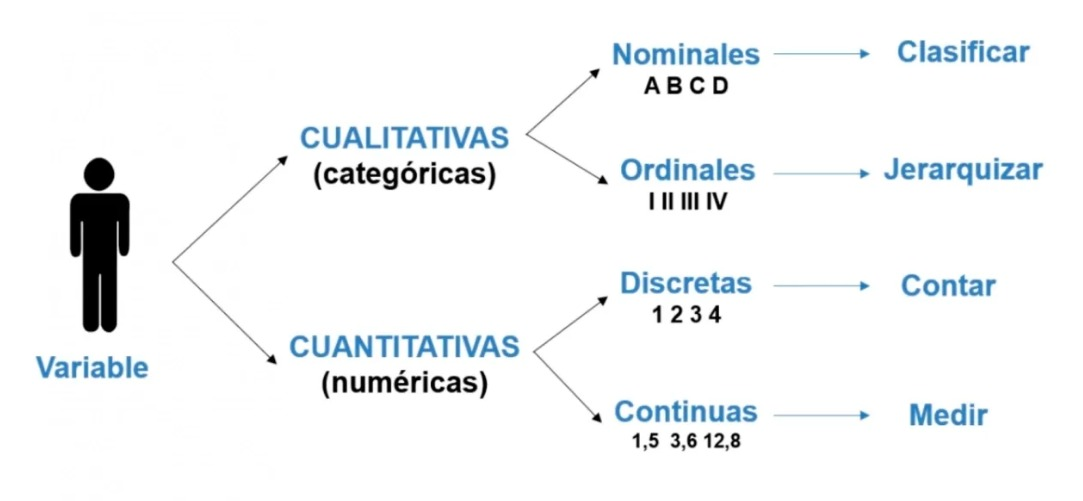
- id: Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja. **(Cualitativa nominal)**
- start_date: Fecha de alta del aviso. **(Cualitativa ordinal)**
- end_date: Fecha de baja del aviso. **(Cualitativa ordinal)**
- created_on: Fecha de alta de la primera versión del aviso. **(Cualitativa ordinal)**
- place: Campos referidos a la ubicación de la propiedad o del desarrollo.**(Cualitativa nominal)**
- lat: Latitud. **(Cuantitativa continua)**
- lon: Longitud. **(Cuantitativa continua)**
- l1: Nivel administrativo 1: país. **(Cualitativa nominal)**
- l2: Nivel administrativo 2: usualmente provincia. **(Cualitiva nominal)**
- l3: Nivel administrativo 3: usualmente ciudad. **(Cualitativa nominal)**
- l4: Nivel administrativo 4: usualmente barrio. **(Cualitativa nominal)**
- property: Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto). **(Cualitativa nominal)**
- operation: Tipo de operación (Venta, Alquiler). **(Cualitativa nominal)**
- type: Tipo de propiedad (Casa, Departamento, PH....). **(Cualitativa nominal)**
- rooms: Cantidad de ambientes (útil en Argentina). **(Cualitativa ordinal)**
- bedrooms: Cantidad de dormitorios (útil en el resto de los países). **(Cualitativa ordinal)**
- surface_total: Superficie total en m². **(Cuantitativa continua)**
- surface_covered: Superficie cubierta en m². **(Cuantitativa continua)**
- price: Precio publicado en el anuncio. **(Cuantitativa continua)**
- currency: Moneda del precio publicado. **(Cualitativa nominal)**
- title: Título del anuncio. **(Cualitativa nominal)**

Importación de bibliotecas a utilizar.

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [41]:
# from google.colab import drive
# drive.mount('/content/drive')

Se carga el dataset en un dataframe de Pandas y se realiza una copia para no trabajar sobre el original.

In [42]:
ds_properaty_original = pd.read_csv('properati_argentina_2021.csv')    

In [80]:
ds_properati = ds_properaty_original.copy()    
ds_properati.head()

,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,XZq2dFGxBiboHY3Bo/tqlw==,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,NaN,206.0,NaN,NaN,Casa - Capital
1,8afoK+yMH/rnnlYiktwgNA==,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,iVaG5rBB47dd1Ya4BMXREA==,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,QE1QVMWKAHWkd0qT0FtPWA==,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,3.0,NaN,180.0,400000.0,USD,Casa - El Chorro
4,tJ5lSk7IysG/71OGhacNZA==,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,2.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Se realiza un análisis introductorio incluyendo el tamaño del dataset y los tipos de dato de cada columna.


In [44]:
ds_properati.shape

(460154, 20)

In [45]:
ds_properati.dtypes

id                           object
start_date                   object
end_date                     object
created_on                   object
latitud                     float64
longitud                    float64
place_l2                     object
place_l3                     object
place_l4                     object
place_l5                     object
place_l6                    float64
operation                    object
property_type                object
property_rooms              float64
property_bedrooms           float64
property_surface_total      float64
property_surface_covered    float64
property_price              float64
property_currency            object
property_title               object
dtype: object

Se descartan las columnas de **id** (que no son de utilidad para el análisis ya que no aportan infromacion alguna sobre las propiedades) y **property_bedrooms** (ya que al tratarse de propiedades en Argentina, este campo no es de interés).

In [94]:
ds_properati.drop(["id", "property_bedrooms"], axis=1, inplace=True) ##ver si sacar o no property bedrooms
ds_properati.head()


,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
0,2021-09-09,2022-01-27,2021-09-09,-38.957632,-68.105443,Neuquén,NaN,NaN,NaN,NaN,Venta,Casa,6.0,NaN,206.0,NaN,NaN,Casa - Capital
1,2021-09-09,2021-10-23,2021-09-09,-34.888878,-56.092368,Montevideo,NaN,NaN,NaN,NaN,Venta,Casa,4.0,193.0,193.0,390000.0,USD,Casa - Malvín
2,2021-09-09,2022-03-09,2021-09-09,-32.488717,-58.257499,Entre Ríos,NaN,NaN,NaN,NaN,Venta,Casa,NaN,110.0,45.0,47000.0,USD,Casa - Uruguay
3,2021-09-09,2022-01-27,2021-09-09,-34.900165,-54.808453,Maldonado,NaN,NaN,NaN,NaN,Venta,Casa,NaN,NaN,180.0,400000.0,USD,Casa - El Chorro
4,2021-09-09,2022-01-27,2021-09-09,-38.954528,-68.041862,Neuquén,NaN,NaN,NaN,NaN,Venta,PH,3.0,NaN,98.0,102000.0,USD,PH - Villa Farrell


Seleccionamos los datos que se van a utilizar:
únicamente los anuncios de propiedades de tipo vivienda ( Casa, PH y Departamento ) ubicados
en Capital Federal cuyo tipo de operación sea venta y su precio se encuentre en dólares (USD). Por lo tanto, analizamos qué datos tenemos en cada una de esas variables.

In [123]:
ds_properati.operation.unique().tolist()

['Venta', 'Alquiler temporal', 'Alquiler']

Vemos que las operaciones no son sólo Venta, por lo que eliminamos las filas que contengan Alquiler y Alquiler temporal ya que no nos interesan en este trabajo. (Mantenemos los NaNs porque serás tratados mas adelante)

In [61]:
ds_properati = ds_properati.drop(ds_properati.index[(ds_properati["operation"] != "Venta") & (ds_properati["property_currency"] != "NaN")])

Ahora las filas que contengan datos diferentes a Casa, PH o Departamento.

In [108]:
ds_properati = ds_properati.drop(ds_properati.index[~ds_properati.property_type.isin(["Casa","Departamento","PH", "NaN"])])

Y por ultimo, eliminamos las filas que contengan un Tipo de cambio diferente a USD

In [109]:
ds_properati = ds_properati.drop(ds_properati.index[(ds_properati["property_currency"] != "USD") & (ds_properati["property_currency"] != "NaN")])

Por ultimo, eliminamos las filas de las propiedades que no sean de Capital Federal.

In [141]:
ds_properati = ds_properati.drop(ds_properati.index[ds_properati["place_l2"] != "Capital Federal"])

Podemos ver que todas las columnas elegidas quedan con los valores deseados.

In [142]:
display(ds_properati.operation.unique().tolist())
display(ds_properati.property_type.unique().tolist())
display(ds_properati.property_currency.unique().tolist())
display(ds_properati.place_l2.unique().tolist())


['Venta', 'Alquiler temporal', 'Alquiler']

['Casa', 'Departamento', 'PH']

['USD']

['Capital Federal']

# Variables Cuantitativas
Estas pueden ser:
- Cuantitativas discretas: Estas variables toman valores numéricos siendo que entre dos valores consecutivos de las mismas no existen valores intermedios. Pueden tomar un conjunto a lo sumo numerable de valores, vinculándose generalmente al proceso de contar. 
- Cuantitativas continuas: Estas variables también toman valores numéricos, pero entre dos valores de la variable existen infinitos valores intermedios, asociándose generalmente al proceso de medir. 

En el caso de nuestro data set las variables cuantitativas, como ya se indicó mas arriba, son:
latitud, longitud, property_surface_total, property_surface_covered, price. Para trabajar sólo sobre estas se crea un nuevo data frame y se calculan medidas de resumen: media, mediana, q1, q3, moda.

In [149]:
df_cuantitativas = ds_properati[["latitud", "longitud", "property_surface_total", "property_surface_covered", "property_price"]]
dic_cuanti = []
for i in df_cuantitativas.columns:
  dic_cuanti.append({'variable': i, 'media': df_cuantitativas[i].mean(), 
                                    'moda': df_cuantitativas[i].mode().to_list(),
                                    'mediana': df_cuantitativas[i].median(),
                                    'rango': df_cuantitativas[i].max() - df_cuantitativas[i].min(),
                                    'primer cuartil': df_cuantitativas[i].quantile(0.25),
                                    'tercer cuartil': df_cuantitativas[i].quantile(0.75)})

pd.DataFrame(dic_cuanti)

,variable,media,moda,mediana,rango,primer cuartil,tercer cuartil
0,latitud,-34.590845,[-34.5412501],-34.594832,2.956880e+01,-34.614953,-34.577273
1,longitud,-58.447569,[-58.4729664],-58.437171,1.733786e+01,-58.464930,-58.407012
2,property_surface_total,112.106762,[50.0],67.000000,1.369900e+05,45.000000,110.000000
3,property_surface_covered,91.412222,[40.0],60.000000,2.169990e+05,41.000000,94.000000
4,property_price,212601.710315,[110000.0],135000.000000,2.139995e+07,88000.000000,226202.750000


A continuación se muestran gráficos de las distribuciones de estas variables cuantitativas. Los resultadosobservados pueden estar afectados por los valores faltantes que más adelante se tratarán.

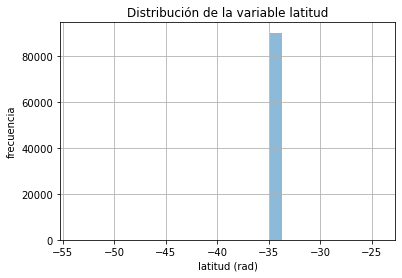

In [67]:
plt.title('Distribución de la variable latitud')
plt.hist(ds_properati['latitud'], bins = 25 , alpha = 0.5) 
plt.xlabel("latitud (rad)") # en q unidad se mide??
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

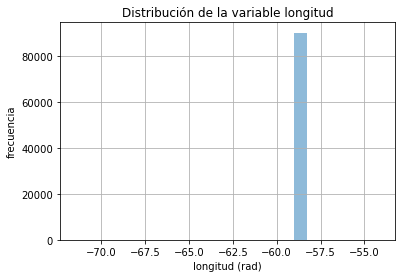

In [56]:
plt.title('Distribución de la variable longitud')
plt.hist(ds_properati['longitud'], bins = 25 , alpha = 0.5) 
plt.xlabel("longitud (rad)") # en q unidad se mide??
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

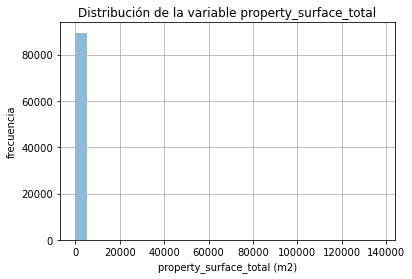

In [57]:
plt.title('Distribución de la variable property_surface_total')
plt.hist(ds_properati['property_surface_total'], bins = 25 , alpha = 0.5) 
plt.xlabel("property_surface_total (m2)")
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

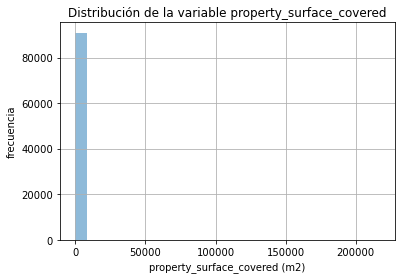

In [58]:
plt.title('Distribución de la variable property_surface_covered')
plt.hist(ds_properati['property_surface_covered'], bins = 25 , alpha = 0.5) 
plt.xlabel("property_surface_covered (m2)") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()

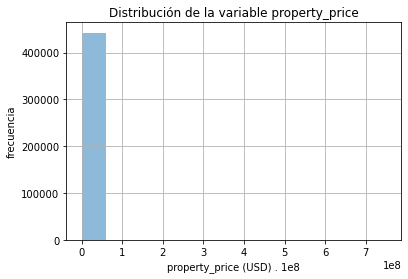

In [100]:
plt.title('Distribución de la variable property_price')
plt.hist(ds_properati['property_price'], bins = 25 , alpha = 0.5) 


scale_factor = 0.5
xmin, xmax = plt.xlim()
plt.xlim(xmin * scale_factor, xmax * scale_factor)


plt.xlabel("property_price (USD) . 1e8") 
plt.ylabel("frecuencia")
plt.grid(True)
plt.show()


# Variables Cualitativas
Estas pueden ser: 

- Nominales: Se diferencian de las Ordinales ya que no necesariamente llevan un orden. Dentro de esta clasificacion podrian llegar a ser de texto o numericas:
    - Texto: Estas podrian ser, por ejemplo el color de ojos de una persona, o algo no necesariamente ordenable.
    - Numericas: Pueden ser por ejemplo ids, o numeros de telefono.
- Ordinales: Una variable cualitativa ordinal podria ser aquella que tenga una escala establecida, con valores ordenados. 
    - Texto: Esta puede ser por ejemplo las medallas de un torneo (Oro,plata,bronce), que mantienen un orden siendo la mejor Oro y la pero la de Bronce.
    - Numericas: 

En el principio del tp ya definimos todos las variables cualitativas que encontramos.
Ahora mostramos los valores posibles de cada variable cualitativa, exeptuando las que tienen solamente un valor.


In [188]:
df_cual_nominal = ds_properati[["property_type","place_l3","property_rooms","property_title"]]
dic_cual_nominal = []
for cual in df_cual_nominal.columns:
  dic_cual_nominal.append({"variable": cual, "tipos" : ds_properati[cual].unique().tolist()})
pd.DataFrame(dic_cual_nominal)


,variable,tipos
0,property_type,"[Casa, Departamento, PH]"
1,place_l3,"[nan, Boca, Once, Boedo, Flores, Nuñez, Retiro..."
2,property_rooms,"[4.0, 3.0, 2.0, 10.0, 5.0, 1.0, nan, 6.0, 7.0,..."
3,property_title,"[VENTA CASA LLAVE EN MANO - COSTA ESMERALDA , ..."


Calculamos la frecuencia de cada categoria segun los valores tomados.

Para cada categoria tenemos:

In [193]:
ds_agrupado_PT = ds_properati["property_type"].value_counts()
ds_agrupado_PL_3 = ds_properati["place_l3"].value_counts()
# ds_agrupado_PTI = ds_properati["property_title"].value_counts()
ds_agrupado_PR = ds_properati["property_rooms"].value_counts()
ds_agrupado_CO = ds_properati["created_on"].value_counts()


Con sus respectivas tablas con la frecuencia:

In [195]:
display(ds_agrupado_PT)

Departamento    86709
PH               9354
Casa             4339
Name: property_type, dtype: int64

Para property Rooms (ambientes)

In [196]:
display(ds_agrupado_PR)

3.0     28531
2.0     27723
4.0     17840
1.0     15504
5.0      5800
6.0      2100
7.0       888
8.0       454
9.0       171
10.0      116
12.0       38
11.0       34
14.0       17
15.0       13
13.0        6
16.0        4
17.0        4
30.0        3
18.0        3
20.0        3
19.0        2
36.0        2
35.0        1
32.0        1
21.0        1
24.0        1
40.0        1
28.0        1
Name: property_rooms, dtype: int64

Para Place_L3 (zona de vivienda):

In [197]:
display(ds_agrupado_PL_3)

Palermo                 16464
Belgrano                 9653
Recoleta                 7225
Caballito                7200
Villa Urquiza            4706
Almagro                  4104
Nuñez                    3744
Villa Crespo             3208
Flores                   3121
Barrio Norte             3118
Puerto Madero            2882
Balvanera                2578
Colegiales               1978
Villa Devoto             1924
Saavedra                 1848
Villa del Parque         1834
Retiro                   1453
San Telmo                1434
San Nicolás              1319
San Cristobal            1308
Barracas                 1250
Boedo                    1241
Floresta                 1196
Monserrat                1123
Parque Chacabuco         1074
Villa Pueyrredón         1012
Coghlan                   992
Villa Luro                728
Mataderos                 719
Chacarita                 708
Liniers                   670
Villa Ortuzar             668
Parque Patricios          639
Villa Luga

Y por ultimo para las property bedrooms:

In [73]:
display(ds_agrupado_BR)

 1.0     31947
 2.0     27414
 3.0     17656
 4.0      4797
 5.0       928
 6.0       241
 7.0       107
 8.0        55
 10.0       27
 9.0        27
 12.0       16
 11.0        7
 16.0        6
 14.0        5
 17.0        5
 15.0        4
 18.0        4
 20.0        4
 13.0        4
 32.0        3
 22.0        2
 30.0        1
 70.0        1
-1.0         1
Name: property_bedrooms, dtype: int64

In [84]:
display(ds_agrupado_CO)

2021-12-16    17417
2021-02-13     7422
2021-04-10     4439
2021-11-03     3895
2021-08-03     3804
              ...  
2021-08-01      104
2021-10-24       89
2021-12-26       83
2021-12-19       80
2021-11-27        4
Name: created_on, Length: 365, dtype: int64

Se puede observar que para la categoria de place_l3 la zona mas frecuente de venta de propiedades es en Palermo, ademas de esto se puede ver que el tipo de propiedad mas frecuente en venta es el de Departamento. Para el caso de las ambientes, se puede ver que el mas frecuente son 3 y para las habitaciones es 1. No le vemos mucho sentido mostrar todos los tipos de "property title" ya que no hay valores frecuentes. Por ultimo, se puede ver que se crearon publicaciones todos los dias del año siendo el mas frecuente el 16 de Diciembre con 17417 publicaciones
 Se podria hacer un grafico con los resultados mas frecuentes (para mejor visualizacion). Si hay muchos tipos lo truncamos en los 10 valores mas frecuentes para poder ver mejor.


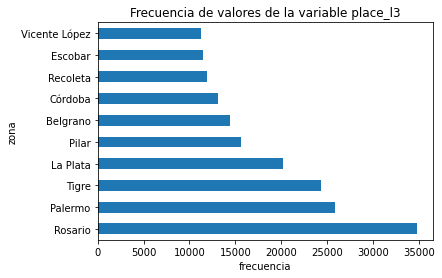

In [113]:
ds_agrupado_PL_3[:10].plot(kind = "barh", title="Frecuencia de valores de la variable place_l3", xlabel="frecuencia",ylabel="zona")

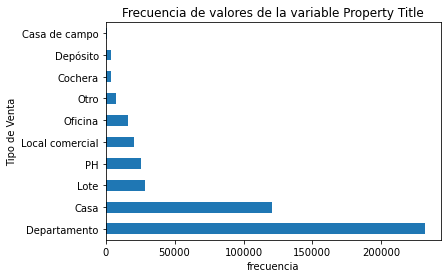

In [114]:
ds_agrupado_PT.plot(kind = "barh", title="Frecuencia de valores de la variable Property Title", xlabel="frecuencia",ylabel="Tipo de Venta")

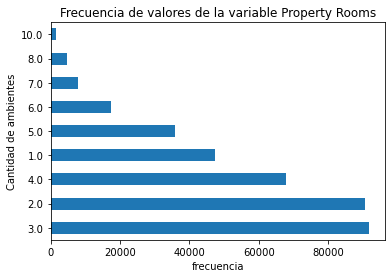

In [116]:
ds_agrupado_PR[:10].plot(kind = "barh", title="Frecuencia de valores de la variable Property Rooms", xlabel="frecuencia",ylabel="Cantidad de ambientes")

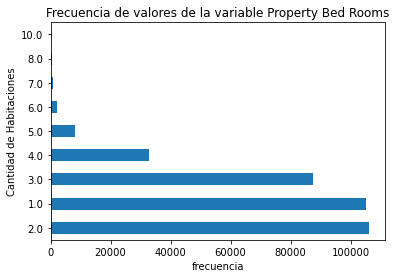

In [117]:
ds_agrupado_BR[:10].plot(kind = "barh", title="Frecuencia de valores de la variable Property Bed Rooms", xlabel="frecuencia",ylabel="Cantidad de Habitaciones")

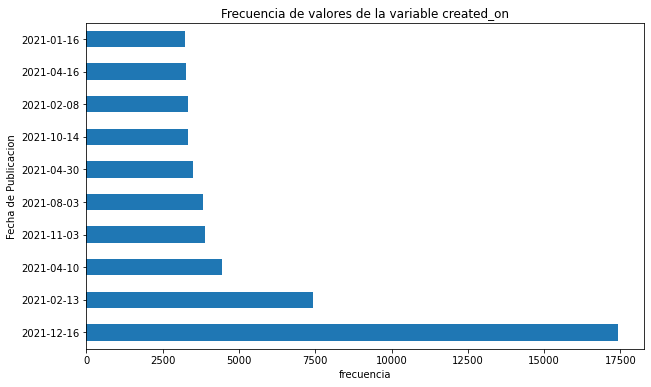

In [173]:
ds_agrupado_CO[:10].plot(kind = "barh", title="Frecuencia de valores de la variable created_on", xlabel="frecuencia",ylabel="Fecha de Publicacion")

**Variables irrelevantes en el analisis**

In [160]:
ds_properati

,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,NaN,73.0,250000.0,USD,PH - Boedo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460072,2021-01-05,2022-09-02,2021-01-05,-34.603245,-58.489810,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,4.0,130.0,100.0,220000.0,USD,Espectacular 4 amb130m2 con Balcon Terraza!!!
460073,2021-01-05,2021-02-17,2021-01-05,-34.614063,-58.482814,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,3.0,68.0,60.0,161000.0,USD,3 ambientes con cochera listo para habitar!
460074,2021-01-05,2021-01-27,2021-01-05,-34.614175,-58.479062,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,1.0,51.0,30.0,75500.0,USD,VENTA MONOAMBIENTE CON PATIO SOL DE MAÑANA ///...
460075,2021-01-05,2021-01-27,2021-01-05,-34.614175,-58.479062,Capital Federal,Villa del Parque,NaN,NaN,NaN,Venta,Departamento,1.0,37.0,31.0,74500.0,USD,VENTA MONOAMBIENTE APAISADO y DIVISIBLE AL CF ...


Queda para despues!!!!!

## Covarianza y Correlación

Tanto la covarianza como la correlación son medidas de asociación lineal entre dos variables.
La Covarianza indica la dirección/sentido de esa asociación lineal y la Correlación mide tanto la fuerza como el sentido de dicha asociación lineal.

El valor (magnitud) de la covarianza depende las unidades en que se miden las variables.
Si las escalas de medida de las variables fueran muy diferentes, la variabilidad estaría dominada por las variables con mayores magnitudes.

La Correlación se define como la covarianza de los datos estandarizados, por lo que evita el problema de las diferencias en las escalas de medición. Se obtiene dividiendo la covarianza de dos variables por el producto de sus desvíos estándar.

Los valores del coeficiente de correlación van de -1 a 1. Cuanto más cerca esté de 1 (lineal perfecta positiva) o -1 (lineal perfecta negativa), más estrechamente relacionadas estarán las dos variables. El signo positivo significa la dirección de la correlación, es decir, si una de las variables aumenta, se supone que la otra también aumentará. Al contar con una muestra poblacional se calcula la correlación mediante un estimador muestral que es el de Pearson.



In [158]:
matriz_cov = ds_properati.cov(numeric_only=True)
matriz_cov

,latitud,longitud,place_l6,property_rooms,property_surface_total,property_surface_covered,property_price
latitud,0.034371,-0.014631,NaN,0.002397,4.388792e+00,4.877227e-01,7.573869e+02
longitud,-0.014631,0.083931,NaN,-0.002308,-4.090952e+00,-2.222323e-01,1.549119e+03
place_l6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_rooms,0.002397,-0.002308,NaN,2.089975,9.673536e+01,7.960451e+01,1.929294e+05
property_surface_total,4.388792,-4.090952,NaN,96.735363,9.048005e+05,3.990744e+05,2.446176e+07
property_surface_covered,0.487723,-0.222232,NaN,79.604509,3.990744e+05,9.244534e+05,1.599300e+07
property_price,757.386910,1549.118958,NaN,192929.368686,2.446176e+07,1.599300e+07,9.813996e+10


In [170]:
matriz_corr=ds_properati.corr(numeric_only=True)
matriz_corr

,latitud,longitud,place_l6,property_rooms,property_surface_total,property_surface_covered,property_price
latitud,1.000000,-0.272408,NaN,0.009559,0.024753,0.002631,0.013267
longitud,-0.272408,1.000000,NaN,-0.005812,-0.014669,-0.000767,0.017365
place_l6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
property_rooms,0.009559,-0.005812,NaN,1.000000,0.071960,0.083247,0.442044
property_surface_total,0.024753,-0.014669,NaN,0.071960,1.000000,0.604785,0.081883
property_surface_covered,0.002631,-0.000767,NaN,0.083247,0.604785,1.000000,0.053028
property_price,0.013267,0.017365,NaN,0.442044,0.081883,0.053028,1.000000


A continuación se muestra la matriz de correlación en un Heatmap:

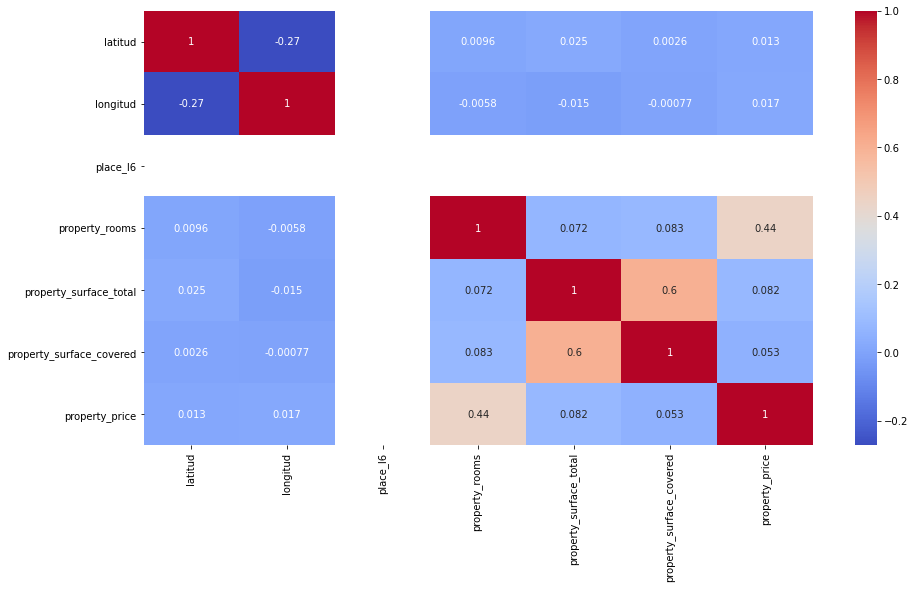

In [172]:
#Grafico la matriz de correlación en un Heatmap

plt.figure(figsize = (15,8))
display(sns.heatmap(matriz_corr, annot = True, cmap='coolwarm'))


### Datos Faltantes

Para todas las columnas se realiza la cuenta del porcentaje de los datos faltantes

In [125]:
porcentajes = ds_properati.isna().sum() / len(ds_properati) * 100
porcentajes

start_date                    0.000000
end_date                      0.000000
created_on                    0.000000
latitud                       4.147328
longitud                      4.147328
place_l2                      0.000000
place_l3                      0.430270
place_l4                     95.463238
place_l5                    100.000000
place_l6                    100.000000
operation                     0.000000
property_type                 0.000000
property_rooms                1.135436
property_surface_total        5.290731
property_surface_covered      3.744945
property_price                0.000000
property_currency             0.000000
property_title                0.000000
dtype: float64

In [112]:
ds_properati["place_l4"].value_counts()

Palermo Hollywood    1769
Palermo Chico        1683
Palermo Soho          918
Palermo Viejo         185
Name: place_l4, dtype: int64

Se puede notar que las columnas con mayor dato faltante son las de place_l6, place_l5 y place_l4, siendo los primeros 2 un 100% de datos faltantes y place_l4 teniendo un 95% de datos faltantes, siendo Palermo Hollywood el dato no nulo mas frecuente

Realizamos un grafico a partir de las variables con respecto al total del dataset

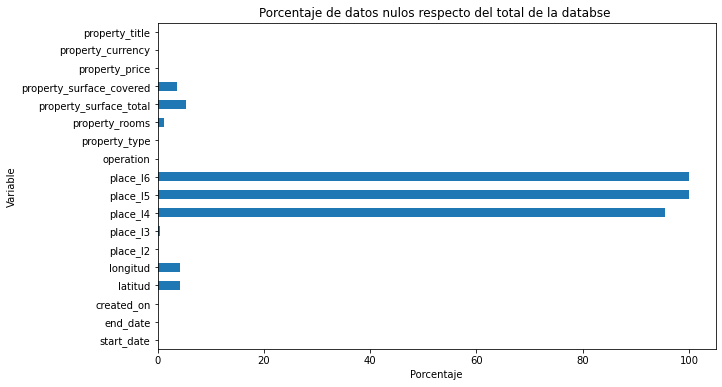

<Figure size 144x144 with 0 Axes>

In [157]:
porcentajes.plot(kind = "barh", title="Porcentaje de datos nulos respecto del total de la databse ", xlabel="Porcentaje",ylabel="Variable")
plt.figure(figsize=(2, 2))
plt.show()

Por otro lado, calculamos el porcentaje de datos faltantes por cada registro sobre el total de datos del registro.

In [190]:
ds_properati.isnull().sum(axis=1) / ds_properati.columns.size * 100 

25        33.333333
42        16.666667
43        16.666667
49        22.222222
51        22.222222
            ...    
460072    16.666667
460073    16.666667
460074    16.666667
460075    16.666667
460090    16.666667
Length: 100402, dtype: float64